# Cálculo de derivadas numéricas
## Proyecto PAPIME PE101019
- Autor: Luis M. de la Cruz Salas
- Rev: lun jul  6 19:29:17 CDT 2020

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-talk')

In [5]:
params = {'figure.figsize' : (10,5),
#          'text.usetex'    : True,
          'xtick.labelsize': 15,
          'ytick.labelsize': 15,
          'axes.labelsize' : 20,
          'axes.titlesize' : 20,
          'legend.fontsize': 15,
          'lines.linewidth'     : 3}

plt.rcParams.update(params)

### Aproximación de la primera derivada usando diferencias finitas hacia adelante (Forward):

$
\displaystyle
\dfrac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x+h) - u(x)}{h}
$

Definimos una función de Python para calcular está formula como sigue:

In [6]:
def forwardFD(u,x,h):
    """ 
    Esquema de diferencias finitas hacia adelante.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica hacia adelante.
    """
    return (u(x+h)-u(x))/h

In [7]:
# Definimos un arreglo con diferentes tamaños de h:
N = 6
h = np.zeros(N)

h[0] = 1.0
for i in range(1,N):
    h[i] = h[i-1] * 0.5

# Definimos un arreglo con valores de 1.0 (donde evaluaremos el cos(x)):
x = np.ones(N)

print(h)
print(x)

[1.      0.5     0.25    0.125   0.0625  0.03125]
[1. 1. 1. 1. 1. 1.]


In [8]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
ef = np.fabs( np.cos(x) - forwardFD(np.sin,x,h) )

# Colocamos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h, ef]).transpose(), 
                     columns=['$h$','$D_+$'])
Error

,$h$,$D_+$
0,1.00000,0.472476
1,0.50000,0.228254
2,0.25000,0.110248
3,0.12500,0.053929
4,0.06250,0.026639
5,0.03125,0.013235


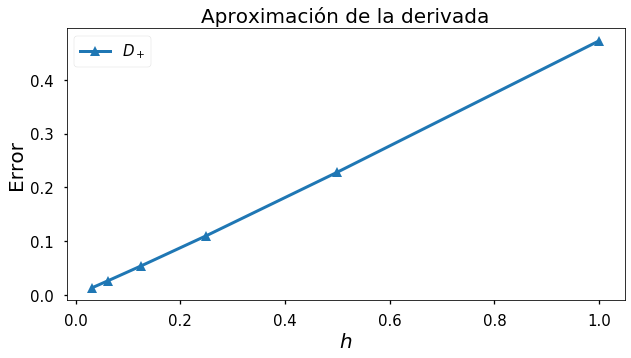

In [9]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.show()

### Aproximación de la primera derivada usando diferencias finitas hacia atrás (Backward):

$
\displaystyle
\frac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x) - u(x-h)}{h}
$

Definimos una función de Python para calcular está formula como sigue:

In [10]:
def backwardFD(u,x,h):
    """ 
    Esquema de diferencias finitas hacia atrás.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica hacia atrás.
    """
    return (u(x)-u(x-h))/h

In [11]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
eb = np.fabs( np.cos(x) - backwardFD(np.sin,x,h) )

# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h, ef, eb]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$'])
Error

,$h$,$D_+$,$D_-$
0,1.00000,0.472476,0.301169
1,0.50000,0.228254,0.183789
2,0.25000,0.110248,0.099027
3,0.12500,0.053929,0.051118
4,0.06250,0.026639,0.025936
5,0.03125,0.013235,0.013059


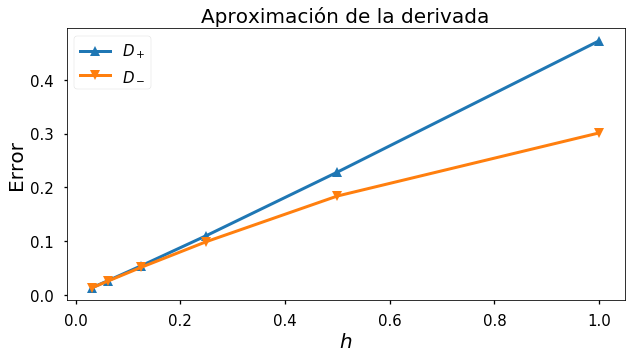

In [12]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.show()

### Aproximación de la primera derivada usando diferencias finitas hacía centradas (Centered):

$
\displaystyle
\frac{\partial u(x)}{\partial x} \approx \lim\limits_{h\to 0} \frac{u(x+h) - u(x-h)}{2h}
$

Definimos una función de Python para calcular está formula como sigue:

In [13]:
def centeredFD(u,x,h):
    """ 
    Esquema de diferencias finitas centradas.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica centrada.
    """
    return (u(x+h)-u(x-h))/(2*h)

In [14]:
# Calculamos el error entre la derivada exacta y la derivada numérica:
ec = np.fabs( np.cos(x) - centeredFD(np.sin,x,h) )

# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error = pd.DataFrame(np.array([h,ef,eb,ec]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$','$D_0$'])
Error

,$h$,$D_+$,$D_-$,$D_0$
0,1.00000,0.472476,0.301169,0.085654
1,0.50000,0.228254,0.183789,0.022233
2,0.25000,0.110248,0.099027,0.005611
3,0.12500,0.053929,0.051118,0.001406
4,0.06250,0.026639,0.025936,0.000352
5,0.03125,0.013235,0.013059,0.000088


Observe que en este caso los errores son varios órdenes de magnitud más pequeños que para $D_+$ y $D_-$. Para hacer una gráfica más representativa usaremos escala log-log:

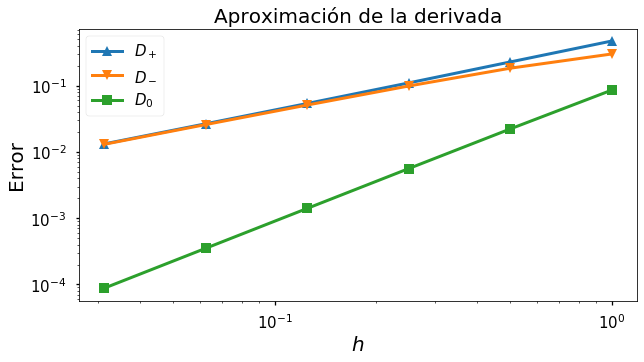

In [15]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.show()

Como se puede apreciar, la gráfica anterior muestra que la aproximación con diferencias finitas centradas es mejor, pues es de orden cuadrático.

## Ejercicio 0.
Para mejorar aún más la aproximación de la derivada se pueden usar más puntos en la fórmula de aproximación. Por ejemplo: 

$
D_3 u = \dfrac{1}{6 h} 
\left[ 2u_{i+1} + 3u_{i} - 6u_{i-1} + u_{i-2} \right]
$

- Agregar una función de Python para calcular la derivada con la fórmula anterior.
- Calcular el error, completar la tabla de errores y hacer el gráfico con todas las aproximaciones. 

Al final de este ejercicio se debe obtener un gráfico similar al de la siguiente figura:

<img src="../Figuras/dernum.png">

**Hint**: Recuerde que $u_i = u(x)$, $u_{i+1} = u(x+h)$, $u_{i-1} = u(x-h)$ y $u_{i-2} = u(x-2h)$.

In [16]:
# Implementación de D3
def centeredFD3(u,x,h):
    """ 
    Esquema de diferencias finitas centradas.
    (2*u(x+h)+3*u(x)-6*u(x-h)+u(x-2*h))/(6*h)
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica centrada.
    """
    return (2*u(x+h)+3*u(x)-6*u(x-h)+u(x-2*h))/(6*h)

In [17]:
ec3 = np.fabs( np.cos(x) - centeredFD3(np.sin,x,h) )

# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error= pd.DataFrame(np.array([h,ef,eb,ec,ec3]).transpose(), 
                     columns=['$h$','$D_+$', '$D_-$','$D_0$','$D_3$'])
Error

,$h$,$D_+$,$D_-$,$D_0$,$D_3$
0,1.00000,0.472476,0.301169,0.085654,0.043287
1,0.50000,0.228254,0.183789,0.022233,0.007314
2,0.25000,0.110248,0.099027,0.005611,0.001014
3,0.12500,0.053929,0.051118,0.001406,0.000132
4,0.06250,0.026639,0.025936,0.000352,0.000017
5,0.03125,0.013235,0.013059,0.000088,0.000002


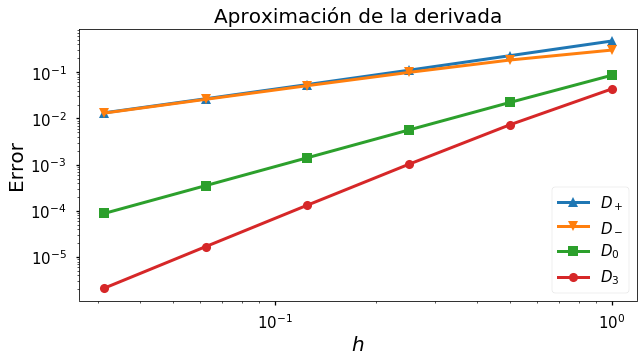

In [18]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.plot(h,ec3, 'o-',label='$D_3$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.show()

# Herramienta interativa
La siguiente herramienta tiene como propósito mostras diferentes funciones y sus derivadas exactas así como el cálculo numérico de las derivadas usando varias aproximaciones. Puedes elegir la función y el tipo de aproximación. Después, puedes mover el punto donde se realiza la aproximación y el tamaño de la $h$.

In [3]:
# LINUX y MACOS
#%run "./utils/interactiveDerivadasNumericas.ipynb"

# Si usas WINDOWS debes comentar la línea de arriba y 
# descomentar la línea que sigue. Deberás también sustituir
# TU_DIRECTORIO por el directorio donde esté el repositorio GeoMaC

#%run "D:\\TU_DIRECTORIO\\GeoMaC\\DerivadasNumericas\\utils\\interactiveDerivadasNumericas.ipynb"
%run "./utils/interactiveDerivadasNumericas.ipynb"

interactive(children=(Dropdown(description='Función', options=(cos(x), sin(x), exp(x), exp(x)*cos(x), tan(x), …

<function FD.numericalDer(f, x0, h, aprox='All')>

## Ejercicio 1.
Implementar la siguiente aproximación y graficarla junto con todos los resultados anteriores:

$$
f^\prime = \frac{3 f_i - 4 f_{i-1} + f_{i-2}}{2h}
$$

In [25]:
# Implementación de D3
def centeredFD4(u,x,h):
    """ 
    Esquema de diferencias finitas centradas.
    (2*u(x+h)+3*u(x)-6*u(x-h)+u(x-2*h))/(6*h)
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica centrada.
    """
    return (3*u(x)-4*u(x-h)+u(x-2*h))/(2*h)

In [32]:
ec4 = np.fabs( np.cos(x) - centeredFD4(np.sin,x,h) )

# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error= pd.DataFrame(np.array([h,ef,eb,ec,ec3,ec4]).transpose(), 
                      columns=['$h$','$D_+$', '$D_-$','$D_0$','$D_3$','$D_{-2}$'])
Error

,$h$,$D_+$,$D_-$,$D_0$,$D_3$,$D_{-2}$
0,1.00000,0.472476,0.301169,0.085654,0.043287,0.301169
1,0.50000,0.228254,0.183789,0.022233,0.007314,0.066408
2,0.25000,0.110248,0.099027,0.005611,0.001014,0.014265
3,0.12500,0.053929,0.051118,0.001406,0.000132,0.003209
4,0.06250,0.026639,0.025936,0.000352,0.000017,0.000754
5,0.03125,0.013235,0.013059,0.000088,0.000002,0.000182


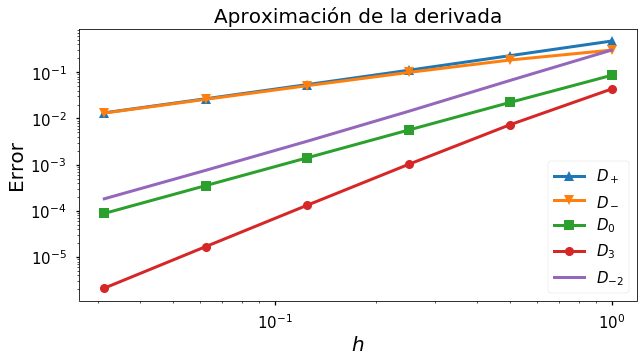

In [34]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.plot(h,ec3, 'o-',label='$D_3$')
plt.plot(h,ec4, '-', label='$D_{-2}}$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.show()

## Ejercicio 2.
Obtener los coeficientes $A$, $B$ y $C$ para una aproximación del siguiente tipo: 

$$
f^\prime = A f_i + B f_{i+1} + C f_{i+2}
$$

y luego implementar la fórmula y graficarla junto con los resultados anteriores.

¿Cuál de todas las aproximaciones usaría? ¿Por qué?

In [29]:
def centeredFD2(u,x,h):
    """ 
    Esquema de diferencias finitas centradas.
    
    Parameters
    ----------
    u : función. 
    Función a evaluar.
    
    x : array
    Lugar(es) donde se evalúa la función
    
    h : array
    Tamaño(s) de la diferencia entre u(x+h) y u(x).
    
    Returns
    -------
    Cálculo de la derivada numérica centrada.
    """
    return (-3*u(x)+4*u(x+h)-u(x+2*h))/(2*h)

In [33]:
ecFD2 = np.fabs( np.cos(x) - centeredFD2(np.sin,x,h) )

# Metemos la información de h y del error en un Dataframe y mostramos el resultado:
Error= pd.DataFrame(np.array([h,ef,eb,ec,ec3,ec4,ecFD2]).transpose(), 
                      columns=['$h$','$D_+$', '$D_-$','$D_0$','$D_3$','$D_{-2}$','$D_{+2}$'])
Error

,$h$,$D_+$,$D_-$,$D_0$,$D_3$,$D_{-2}$,$D_{+2}$
0,1.00000,0.472476,0.301169,0.085654,0.043287,0.301169,0.054474
1,0.50000,0.228254,0.183789,0.022233,0.007314,0.066408,0.015967
2,0.25000,0.110248,0.099027,0.005611,0.001014,0.014265,0.007759
3,0.12500,0.053929,0.051118,0.001406,0.000132,0.003209,0.002389
4,0.06250,0.026639,0.025936,0.000352,0.000017,0.000754,0.000651
5,0.03125,0.013235,0.013059,0.000088,0.000002,0.000182,0.000169


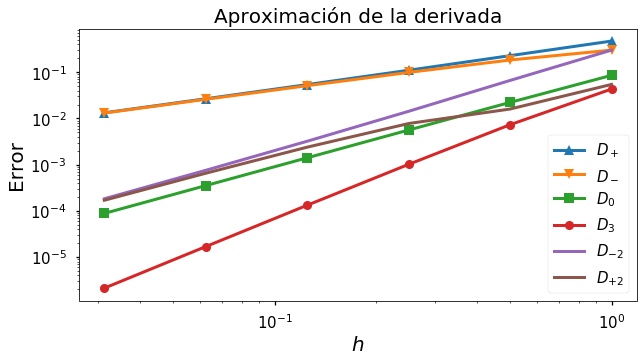

In [35]:
# Hacemos el gráfico del error vs h
plt.plot(h, ef, '^-', label='$D_+$')
plt.plot(h, eb, 'v-', label='$D_-$')
plt.plot(h, ec, 's-', label='$D_0$')
plt.plot(h,ec3, 'o-',label='$D_3$')
plt.plot(h,ec4, '-', label='$D_{-2}}$')
plt.plot(h,ecFD2, '-', label='$D_{+2}$')
plt.xlabel('$h$')
plt.ylabel('Error')
plt.title('Aproximación de la derivada')
plt.legend()
plt.loglog()  # Definimos la escala log-log
plt.show()

Se observa que la mejor aproximación (menor error) de la derivada se da cuando se tiene un mayor número de puntos, en este caso $D_3$. Sin embargo, si no se toma en consideración esta ultima, se observa que la aproximación mediante las diferencias centradas $D_0$ sería la mejor aproximación de la derivada, aunque para este caso en particular para valores de $h$ cercanos a la unidad, $D_{+2}$ podría ser una mejor aproximación
. 